In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
from sklearn.linear_model import SGDRegressor

In [4]:
dataset = pd.read_csv('Data_miniproject.csv')

# EDA

In [5]:
dataset

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


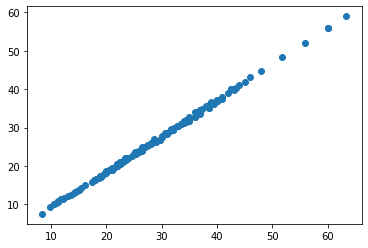

In [6]:
plt.scatter(dataset['Weight1'], dataset['Weight'])

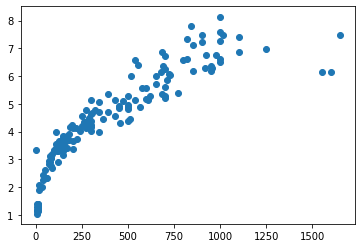

In [7]:
plt.scatter(dataset['Cost'], dataset['Width'])

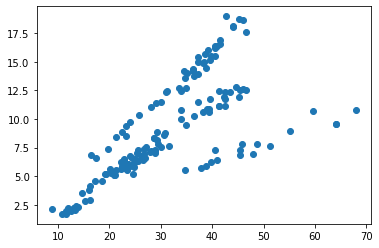

In [8]:
plt.scatter(dataset['Length'], dataset['Height'])

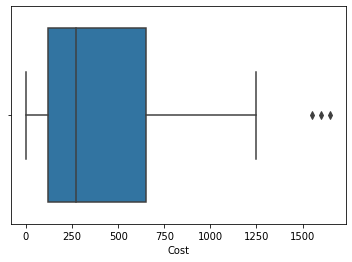

In [61]:
sns.boxplot(dataset['Cost'])

In [62]:
# Few outliers are detected. Cost beyond 1300, Removing the outliers to avoid impact to the model due to them

In [66]:
dataset.drop(dataset[dataset.Cost > 1300].index, inplace = True)

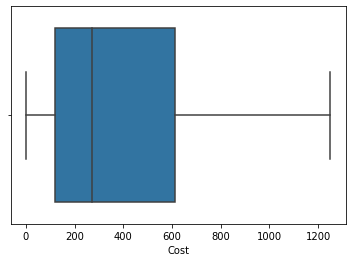

In [67]:
sns.boxplot(dataset['Cost'])

In [ ]:
# Building correlation plots

In [9]:
dataset_corr = dataset.corr()
dataset_corr

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Weight,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Weight1,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


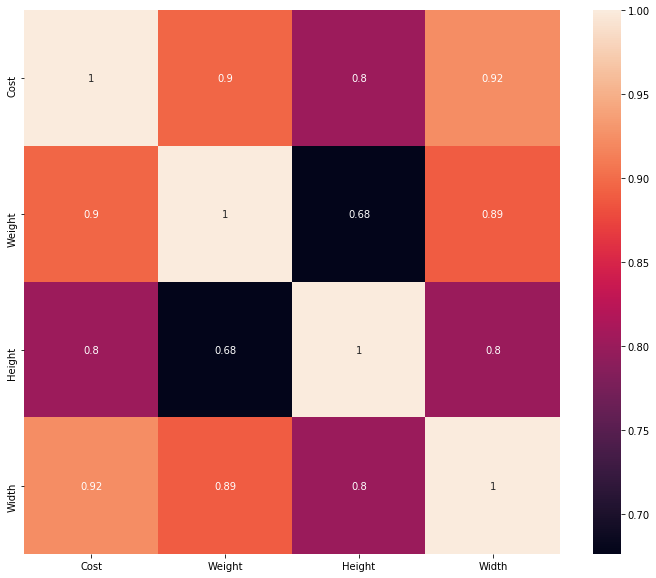

In [79]:
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(dataset_corr, annot= True)

In [ ]:
# From the heat map, it is clear that Weight and Weight1 are highly correlated. Also length and weight are correlated
# Hence removing the features Weight1 adn Length from the dataset.

In [68]:
dataset.drop(['Weight1', 'Length'], axis = 1, inplace = True)

In [77]:
dataset

,Cost,Weight,Height,Width
0,242.0,23.2,11.5200,4.0200
1,290.0,24.0,12.4800,4.3056
2,340.0,23.9,12.3778,4.6961
3,363.0,26.3,12.7300,4.4555
4,430.0,26.5,12.4440,5.1340
...,...,...,...,...
154,12.2,11.5,2.0904,1.3936
155,13.4,11.7,2.4300,1.2690
156,12.2,12.1,2.2770,1.2558
157,19.7,13.2,2.8728,2.0672


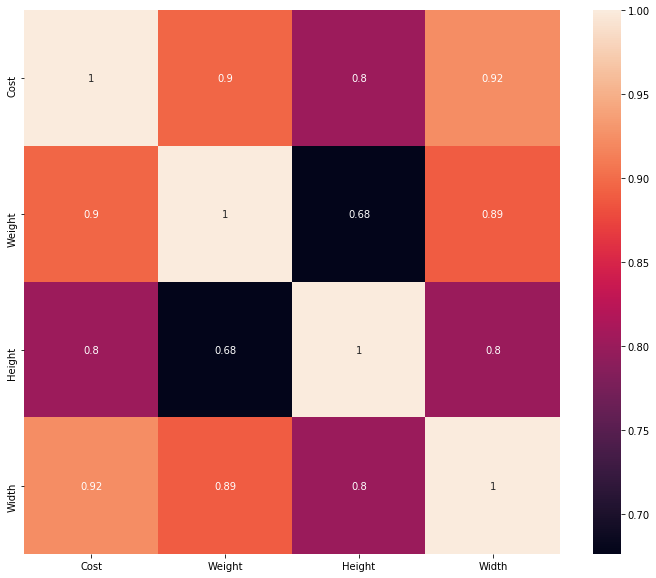

In [81]:
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(dataset.corr(), annot= True)

In [ ]:
# checking for rows with null values.

In [10]:
dataset.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

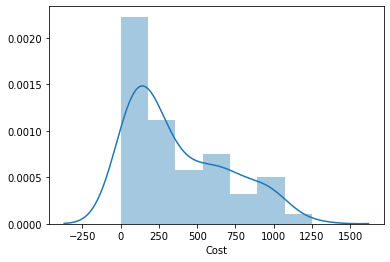

In [158]:
sns.distplot(dataset['Cost'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24b87f90>,
      dtype=object)

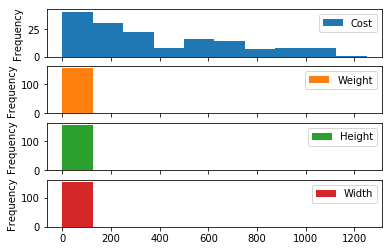

In [163]:
dataset.plot.hist(subplots = True)

# Applying Linear Regression Model

In [82]:
features = ['Weight', 'Height', 'Width']

In [83]:
x = dataset.loc[:,features]
y = dataset['Cost']

In [84]:
x

,Weight,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340
...,...,...,...
154,11.5,2.0904,1.3936
155,11.7,2.4300,1.2690
156,12.1,2.2770,1.2558
157,13.2,2.8728,2.0672


In [85]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Cost, Length: 156, dtype: float64

In [143]:
#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
print('Co efficients are ', lin_reg.coef_)
print('Intercept is ', lin_reg.intercept_)

Co efficients are  [129.18359725  61.558216   131.81212919]
Intercept is  371.3233870967743


In [228]:
num_data = x.shape[0]
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rse /= num_data - 2
rse = math.sqrt(rse)
r2 = r2_score(y_test, y_pred)

In [231]:
print ('MSE = ', mse)
print ('RMSE = ', rmse)
print ('RSE = ', rse)
print ('R Square = ', r2)

MSE =  8957.413630847363
RMSE =  94.64361378797496
RSE =  0.07146325157969599
R Square =  0.9049323289674185


# Stochastic Gradient Descent using sklearn

In [235]:
sgd_reg = SGDRegressor(max_iter = 10000, eta0 = 1e-3)
sgd_reg.fit(x_train, y_train)

/Users/sumanth/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [236]:
print('Co efficients are ', sgd_reg.coef_)
print('Intercept is ', sgd_reg.intercept_)

Co efficients are  [131.6972961   64.24306002 126.95274964]
Intercept is  [371.32285937]


In [237]:
num_data = x.shape[0]
y_pred = sgd_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rse /= num_data - 2
rse = math.sqrt(rse)
r2 = r2_score(y_test, y_pred)

In [238]:
print ('MSE = ', mse)
print ('RMSE = ', rmse)
print ('RSE = ', rse)
print ('R Square = ', r2)

MSE =  8956.308509154922
RMSE =  94.6377752758111
RSE =  0.021541752207744014
R Square =  0.9049440579496714


# Vanilla Gradient Descent

In [188]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [189]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(theta, X, y)
    return theta, cost_history

In [233]:
learning_rate = 0.005
n_iter = 5000

theta = np.random.randn(x_train.shape[1] + 1,1)
X_b = np.c_[np.ones((len(x_train), 1)), x_train]
y_train = np.array(y_train).reshape(len(y_train),1)

theta, cost_history = gradient_descent(X_b, y_train, theta, learning_rate, n_iter)
print('Theta0: {:0.3f},\nTheta1: {:0.3f},\nTheta2: {:0.3f},\nTheta3: {:0.3f} '.format(theta[0][0],theta[1][0],theta[2][0],theta[3][0]  ))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print("Training - RMSE = %.2f" % math.sqrt(  cost_history[-1] ))
predict = lambda X, weights : X.dot(weights)    
weights = np.array([ theta[0][0],theta[1][0],theta[2][0],theta[3][0] ])
y_pred = np.zeros(len(y_test))
mse = 0

x_test_calc = np.c_[np.ones((len(x_test),1)),x_test]
for idx,val in enumerate(x_test_calc):
    y_pred[idx] = predict(val, weights)
        
print("Test - Mean squared error(MSE) = %.2f" %   mean_squared_error(y_test, y_pred))
print("Test - Root Mean squared error(RMSE) = %.2f" % math.sqrt(  mean_squared_error(y_test, y_pred)))
print('Test - Variance score(R2) = %.2f' % r2_score(y_test, y_pred))

Theta0: 371.323,
Theta1: 130.273,
Theta2: 62.072,
Theta3: 130.304 
Final cost/MSE:  85053886.003
Training - RMSE = 9222.47
Test - Mean squared error(MSE) = 9000.67
Test - Root Mean squared error(RMSE) = 94.87
Test - Variance score(R2) = 0.90


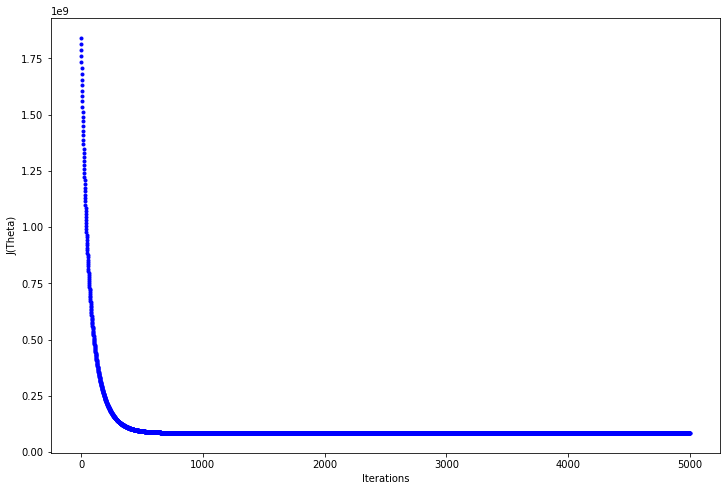

In [216]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

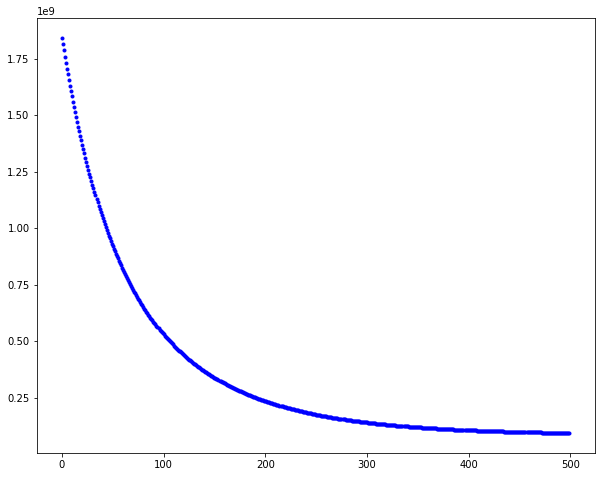

In [218]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(500),cost_history[:500],'b.')

# Mini Batch Gradient Descent

In [219]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [226]:
    lr =0.001
    n_iter = 10000

    theta = np.random.randn(x_train.shape[1] + 1,1)
 
    y_train = np.array(y_train).reshape(len(y_train), 1)

    theta,cost_history = minibatch_gradient_descent(x_train, y_train, theta, lr, n_iter)

    print('Theta0: {:0.3f},\nTheta1: {:0.3f},\nTheta2: {:0.3f},\nTheta3: {:0.3f} '.format(theta[0][0],theta[1][0],theta[2][0],theta[3][0]  ))
    print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
    print("Training - RMSE = %.2f" % math.sqrt(  cost_history[-1] ))
    predict = lambda X, weights : X.dot(weights)    
    weights = np.array([ theta[0][0],theta[1][0],theta[2][0],theta[3][0] ])
    y_pred = np.zeros(len(y_test))
    mse = 0

    x_test_calc = np.c_[np.ones((len(x_test),1)),x_test]
    for idx,val in enumerate(x_test_calc):
        y_pred[idx] = predict(val, weights)
        
    print("Test - Mean squared error(MSE) = %.2f" %   mean_squared_error(y_test, y_pred))
    print("Test - Root Mean squared error(RMSE) = %.2f" % math.sqrt(  mean_squared_error(y_test, y_pred)))
    print('Test - Variance score(R2) = %.2f' % r2_score(y_test, y_pred))

Theta0: 371.307,
Theta1: 131.516,
Theta2: 64.455,
Theta3: 126.944 
Final cost/MSE:  12796772.812
Training - RMSE = 3577.26
Test - Mean squared error(MSE) = 8949.51
Test - Root Mean squared error(RMSE) = 94.60
Test - Variance score(R2) = 0.91


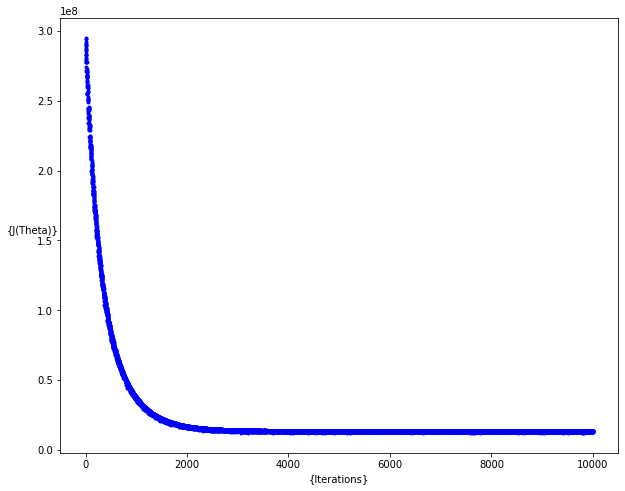

In [227]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [1]:
# END OF NOTEBOOK